# Исследование рынка игр

**Постановка задачи**

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Откроем файл и изучим общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9112,Hero's Saga Laevatein Tactics,DS,2008.0,Role-Playing,0.13,0.00,0.00,0.01,62.0,tbd,T
3435,Lost: Via Domus,X360,2008.0,Action,0.18,0.34,0.00,0.07,55.0,6.4,T
9893,Jikkyou Powerful Pro Yakyuu 2014,PSV,2014.0,Sports,0.00,0.00,0.12,0.00,NaN,NaN,NaN
12498,Theme Park,DS,2007.0,Simulation,0.00,0.02,0.03,0.00,72.0,7.6,E
16606,Mystereet,PS2,2006.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных наблюдаются пропуски, кроме того необходимо переименовать столбцы, привести столбцы к нужным типам. Приступим к предобработке!

**Изучим значения в некоторых колонках на предмет наличия явных дубликатов**

In [7]:
df[df.duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


**Изучим значения в некоторых колонках на предмет наличия неявных дубликатов**

In [8]:
# Изучим значения в некоторых колонках на предмет наличия неявных дубликатов
df[df[['Name', 'Platform', 'Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
for col in ['Platform', 'Genre', 'Rating']:
    print(df[col].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Есть 2 пары дублирующихся строк. Исправим это при предобработке.

### Подготовим данные к исследованию

Произведем замену названий столбцов

In [10]:
df.columns = df.columns.str.lower()
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1247,Simpsons Wrestling,PS,2001.0,Fighting,0.23,1.16,0.0,0.11,NaN,NaN,NaN


Значения **tbd** в колонке **user_score**, скорее всего, означает, что оценки подлежат уточнению (To Be Determined) - нам неоткуда взять эти данные, поэтому логичнее всего заменить их на NaN

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Преобразуем типы данных в столбцах, предварительно изучив данные в них

In [12]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
df = df.astype({
    'year_of_release':'Int64', # год выпуска - является целочисленным
    'critic_score': 'Int64', # оценка критика - целочисленная 100-бальная шкала
    'user_score': 'float'} # оценка пользователей - числа с плавающей запятой
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


Ещё раз рассмотрим столбцы с пропущенными значениями

In [17]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [18]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

- **name, genre** - по 2 пропуска в 2 строках, заменить эти значения на что-то осмысленное невозможно - удалим эти значения. Скорее всего, этот единичный случай связан с ошибкой в заполнении данных.
- **year_of_release** - 269 пропусков, заменять на среднее или медиану было бы некорректным решением - удалим пропуски. Таких случаев также немного - год выпуска по каким-либо причинам может быть неизвестен, либо имеет место ошибка в заполнении данных
- **critic_score, user score** - 8578 и  9125 пропусков соответственно - скорее всего оценок для игр просто нет, поэтому заполнить значения мы не можем. Пропуски в оценках могли возникнуть, например, из-за малого количества оставленных оценок пользователями или критиками
- **rating** - 6766 пропусков, ESRB - это рейтинг для США и Канады, значит пропуск не связан с ошибкой заполнения данных. При этом заменять пропуски на RP - рейтинг ожидается - некорректно, ведь игры выпускаются не только для этих стран, заменим на no_ESRB.

In [19]:
df.loc[df['rating'].isna(), 'rating'] = 'no_ESRB' # 'RP'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Посчитаем  суммарные продажи во всех регионах, запишем их в отдельный столбец

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_ESRB,31.38


Данные предобработаны, однако заменить большинство пропусков, к сожалению, не предоставляется возможным, поэтому будем работать с имеющимися корректными данными.

In [22]:
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во N

In [23]:
# Избавимся от пропусков в данных
df = df.dropna(subset=['name', 'genre'])
df = df.dropna(subset=['year_of_release'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


### Исследовательский анализ данных

#### Рассмотрим, сколько игр выпускалось в разные годы

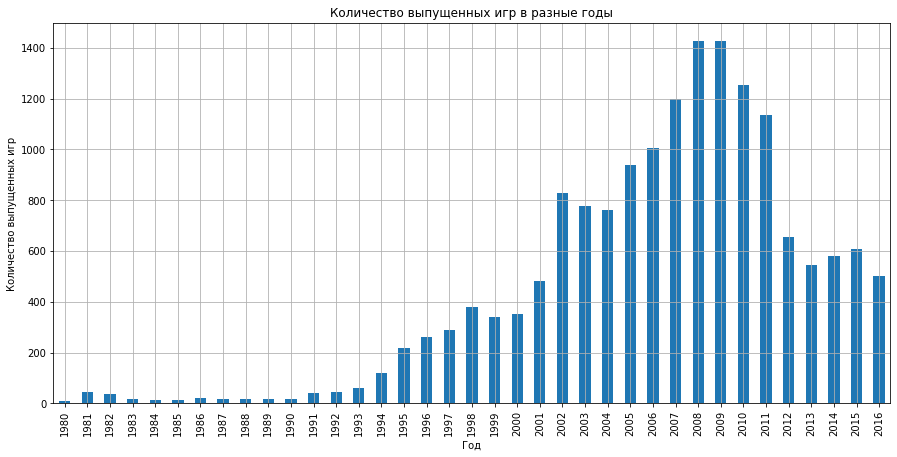

In [25]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(15,7),
                                                  xlabel='Год', ylabel='Количество выпущенных игр',
                                                  title='Количество выпущенных игр в разные годы')
plt.grid()
plt.show()

Рост количества выпускаемых игр начался с 1990 года - тогда начали получать распространение компьютеры и первые игровые консоли, далее наблюдается резкий скачок в 2002 году, пик количества выпущеных игр приходится на 2008-2009 годы, затем идет быстрый спад, который можно связать с увеличением затрачиваемого времени разработчиками на создание игр, а также развитием рынка мобильных игр на iOS и Android.

#### Изучим, как менялись продажи игр по платформам

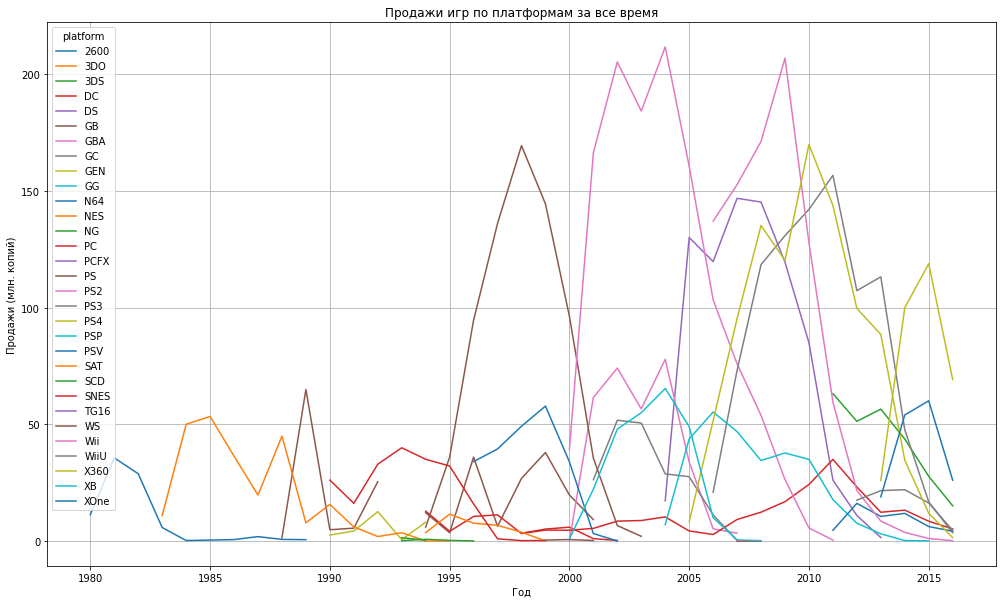

In [26]:
df.groupby(['year_of_release', 'platform'])['total_sales'].sum()\
    .sort_values().unstack().plot(figsize=(17,10),
                                  title='Продажи игр по платформам за все время',
                                  xlabel='Год',
                                  ylabel='Продажи (млн. копий)')
plt.grid()
plt.show()

Слишком много платформ, сравнивать их на таком графике неудобно. Рассмотрим итоговое колчество проданных игр на каждой платформе, а также динамику для каждой платформы отдельно.

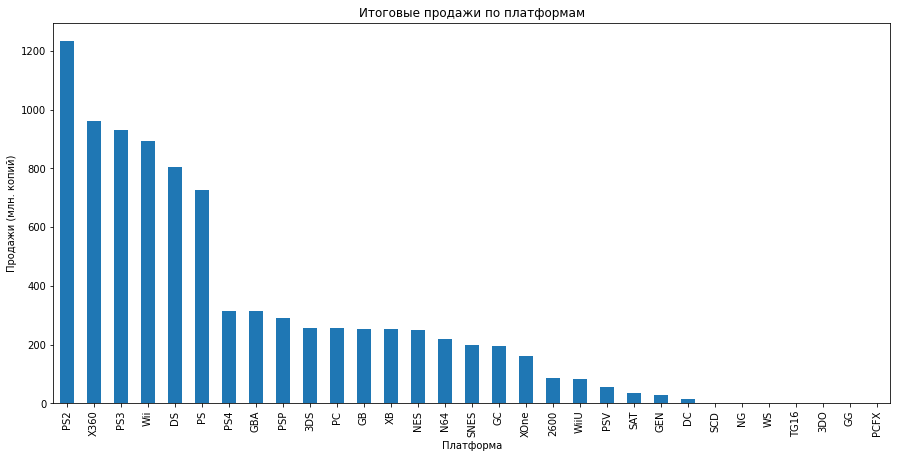

In [27]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,7),
                                                                              title='Итоговые продажи по платформам',
                                                                              xlabel='Платформа',
                                                                              ylabel='Продажи (млн. копий)')
plt.show()

Чётко выделяются 6 платформ-лидеров. Изучим продажи каждой платформы по годам.

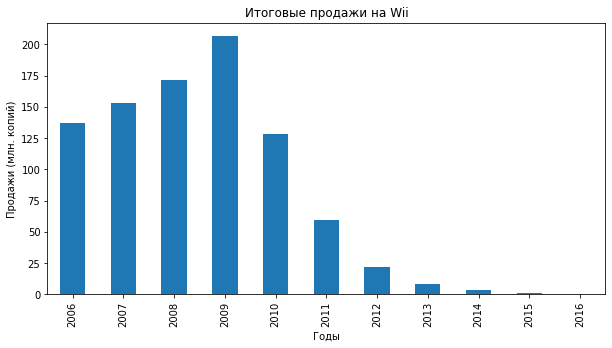

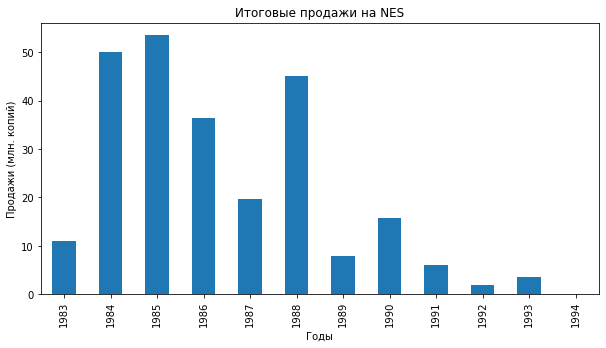

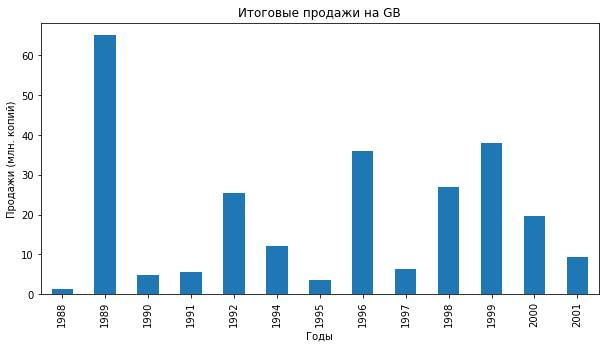

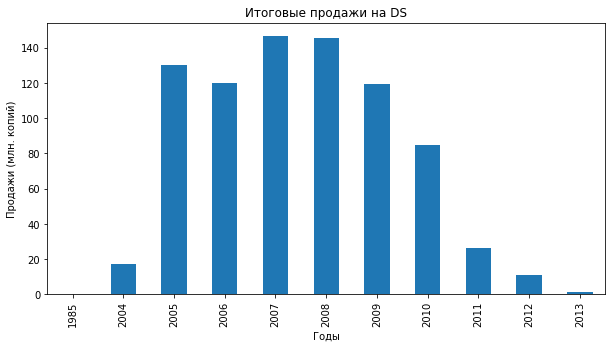

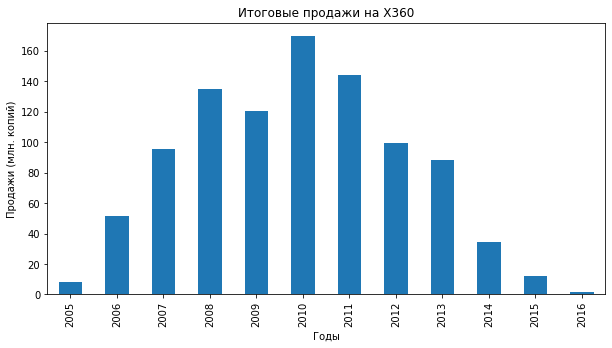

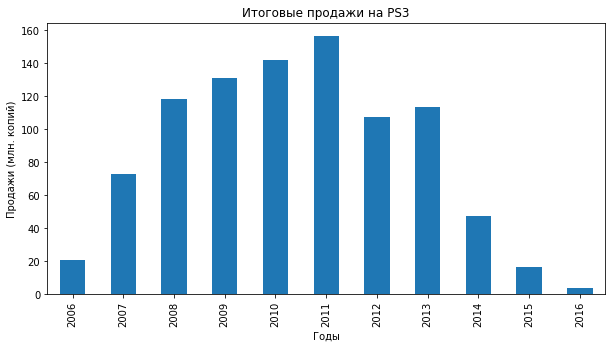

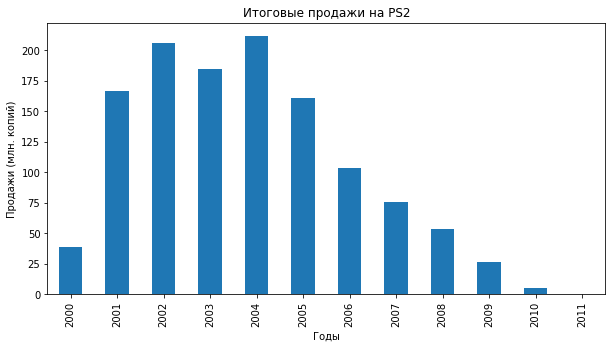

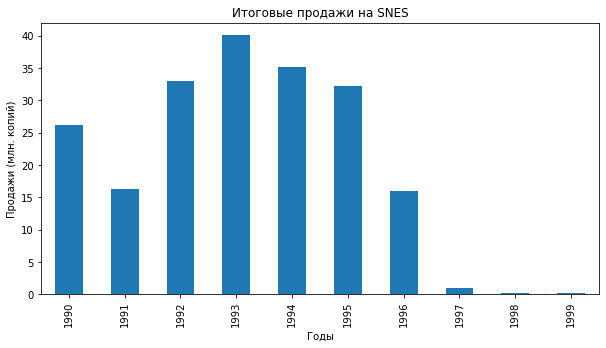

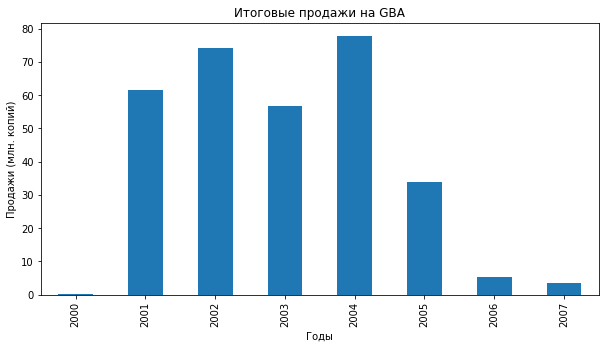

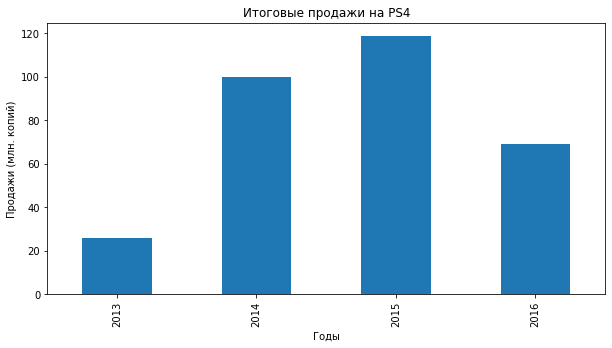

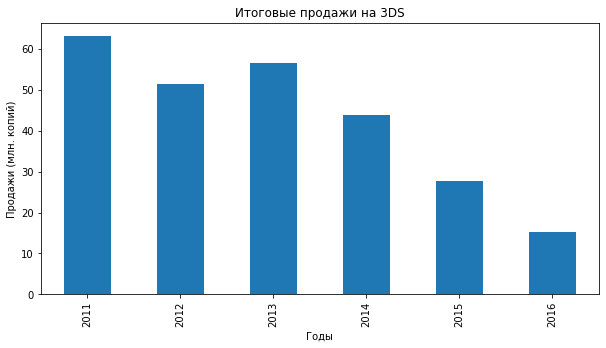

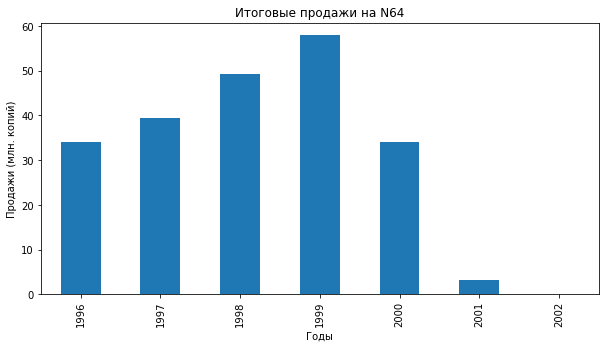

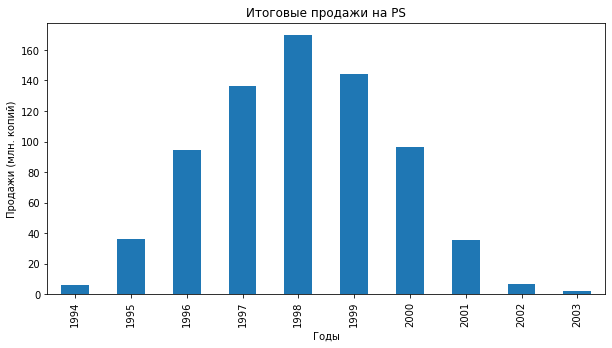

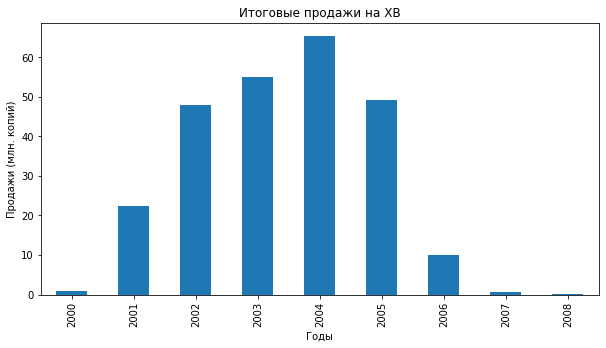

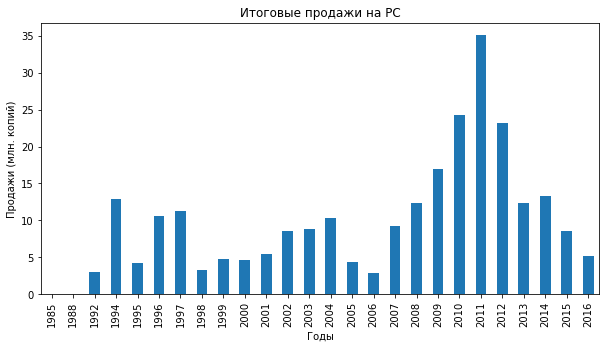

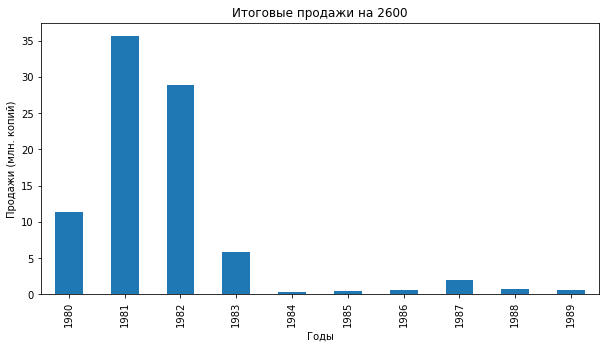

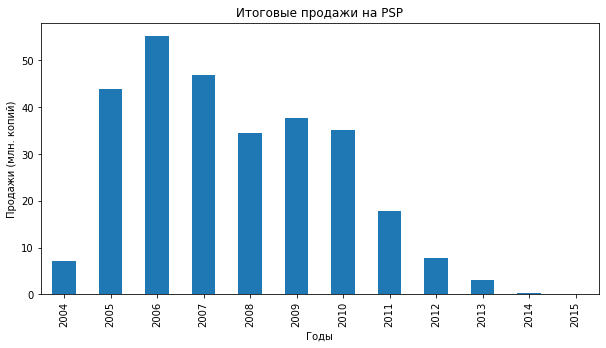

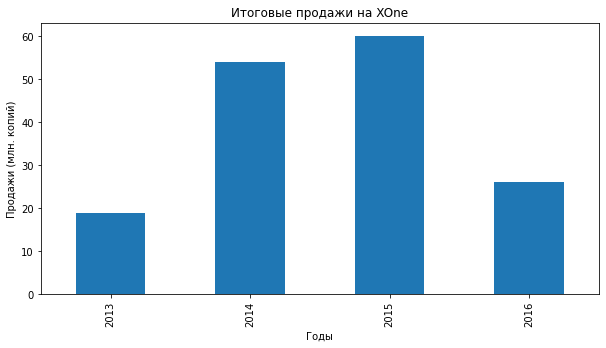

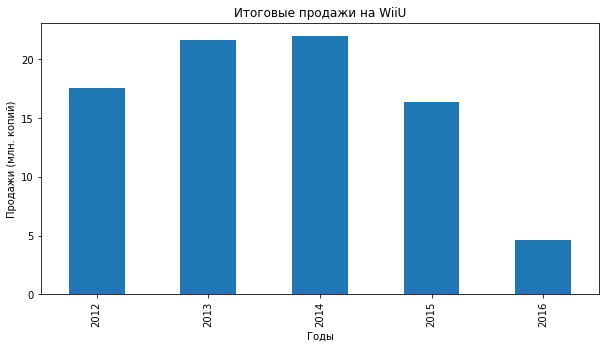

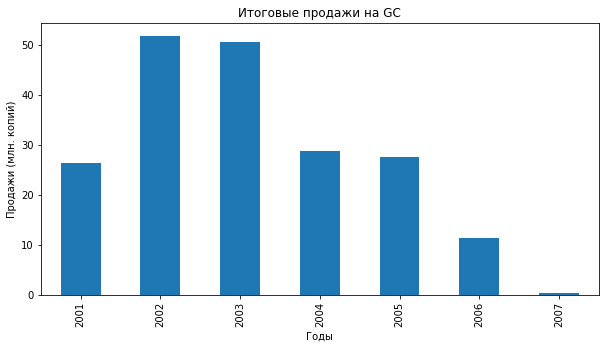

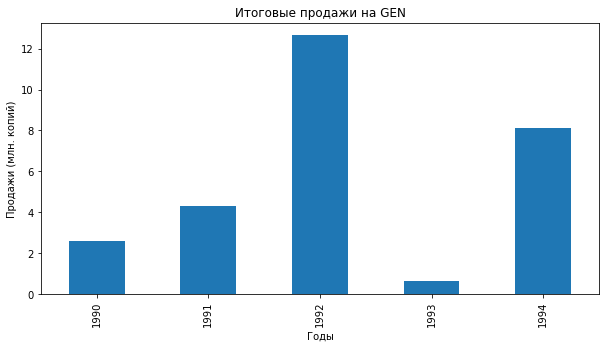

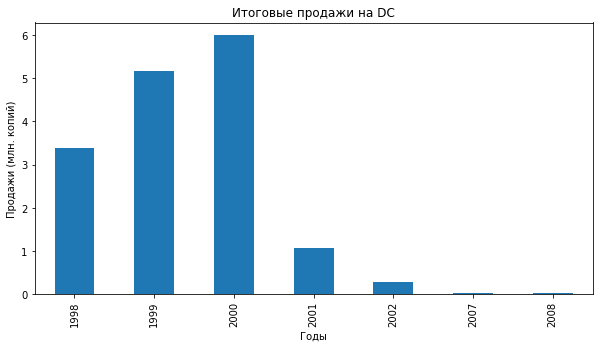

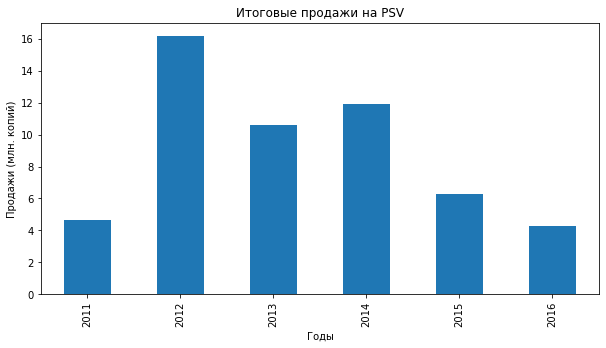

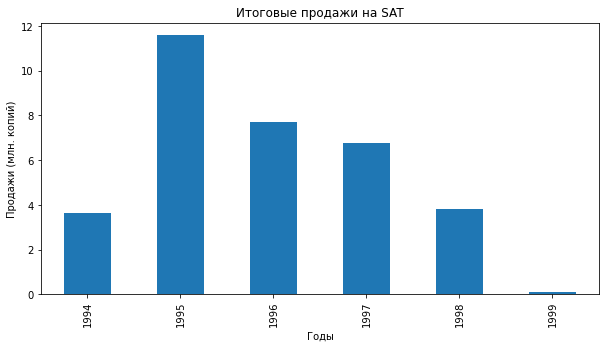

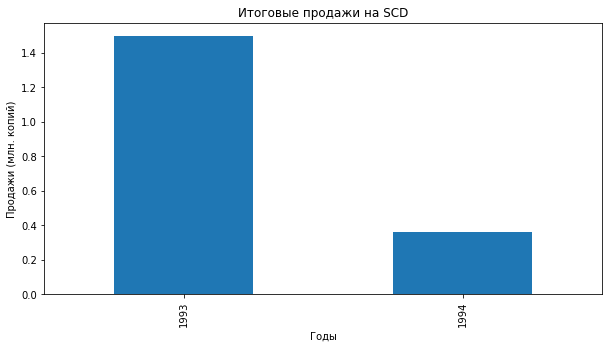

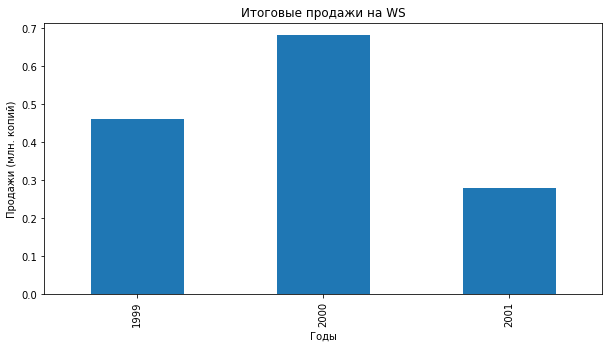

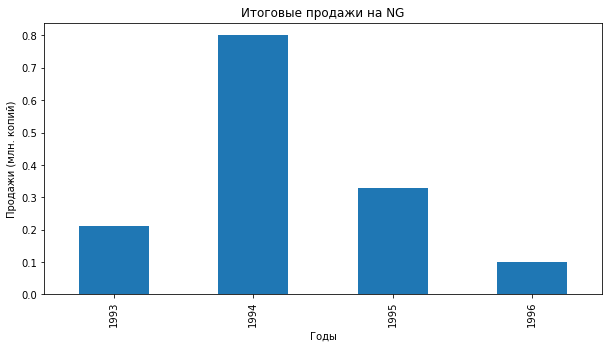

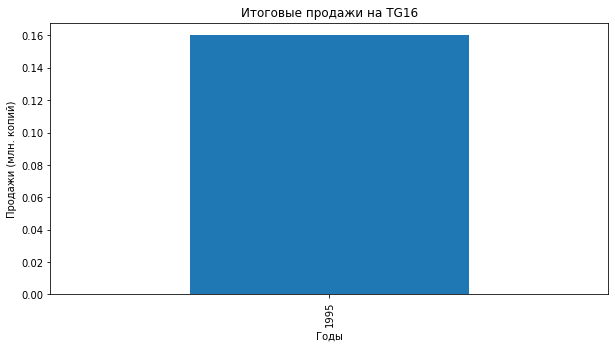

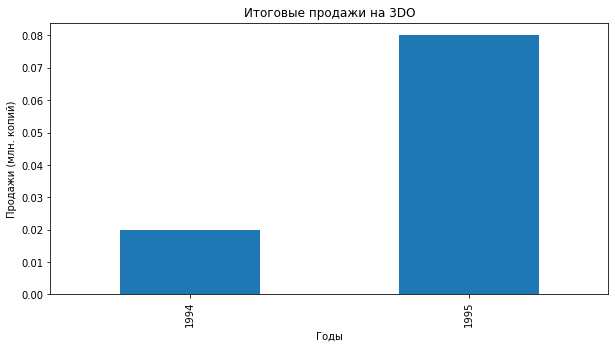

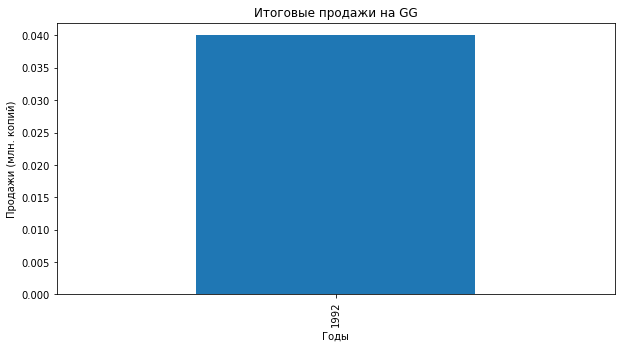

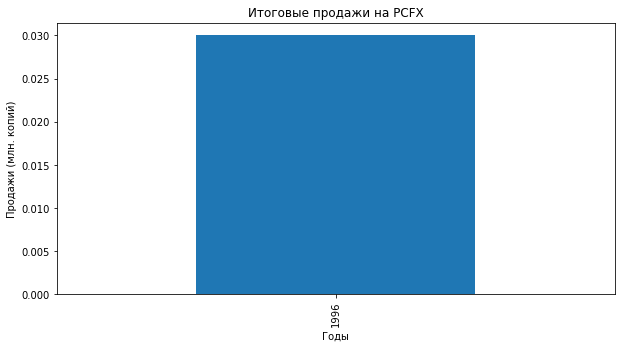

In [28]:
for p in list(df['platform'].unique()):
    df[df['platform'] == p].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(10,5),
                                                                              title=f'Итоговые продажи на {p}',
                                                                              xlabel='Годы',
                                                                              ylabel='Продажи (млн. копий)')
    plt.show()

In [29]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64

- Опираясь на распределение по годам, **большинство платформ, как правило, "живёт" 5-7 лет** - это срок, в течение которого платформа имеет наиболее высокие продажи.
- **Топ-6 платформ по продажам за всё время: PS2, X360, PS3, Wii, DS, PS** - во многом это были инновационные для своего времени игровые консоли, однако **сейчас продажи игр для этих платформ упали или игры на них совсем не продают** - эти данные не помогут нам при построении прогноза, поэтому для дальнейшего анализа мы рассмотрим актуальный период.

#### Изучим актуальный период

В качестве актуального периода для прогноза на 2017 год возьмём данные с 2014 по 2016 год включительно - индустрия игр меняется каждый день, поэтому брать больший промежуток времени будет некорректно.

In [31]:
new_df = df[df['year_of_release'] >= 2014].reset_index(drop=True)
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no_ESRB,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,no_ESRB,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,no_ESRB,7.98


In [32]:
new_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

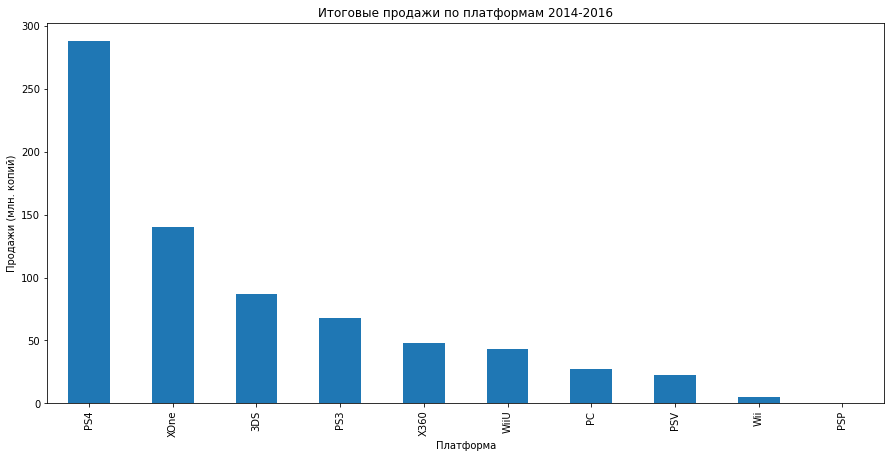

In [33]:
new_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,7),
                                                                              title='Итоговые продажи по платформам 2014-2016',
                                                                              xlabel='Платформа',
                                                                              ylabel='Продажи (млн. копий)')
plt.show()

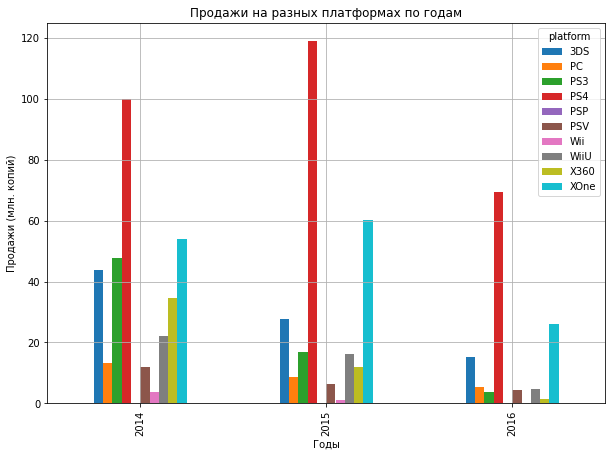

In [34]:
#plt.figure(figsize=(5,5))
new_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()\
    .plot(kind='bar',
          #log_x=False,
          #stacked=True, 
          figsize=(10,7), 
          title='Продажи на разных платформах по годам',
          xlabel='Годы',
          ylabel='Продажи (млн. копий)')
plt.grid()
plt.show()

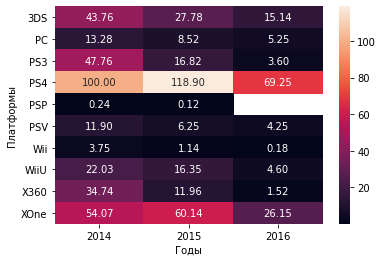

In [35]:
sns.heatmap(new_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().sort_values().unstack().T, 
            annot=True, fmt='.2f')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

- Для актуального периода ситуация иная, топ-1 платформа с отрывом в два раза от второго места - PS4, она вышла в конце 2013 года и продажи игр на ней растут, за ней идёт XOne (продажи также растут), и уже с большим отставанием идут 3DS (продажи просели), PS3 (падение продаж, т.к. предшественник PS4), X360 (падение продаж, т.к. предшественник XOne) и т.д.
- Наименее востребованные платформы - PSP и Wii, что объясняется наличием PSV и WiiU - новых поколений данных консолей, хотя их продажи тоже падают.
- PC, то есть ПК, является наиболее стабильной платформой, что довольно логично - люди вряд ли перестанут играть в игры на компьютере даже при условии существования консолей.

**Таким образом, можно выделить потенциально наиболее прибыльные платформы:**
- PS4
- XOne
- PC

#### Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам

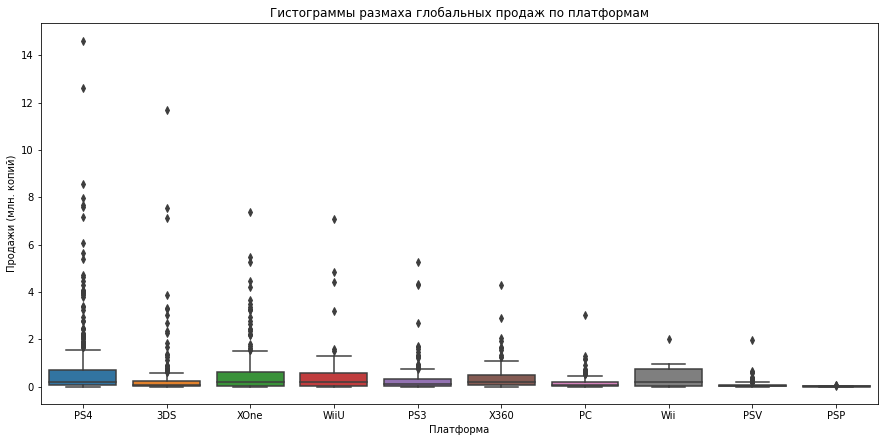

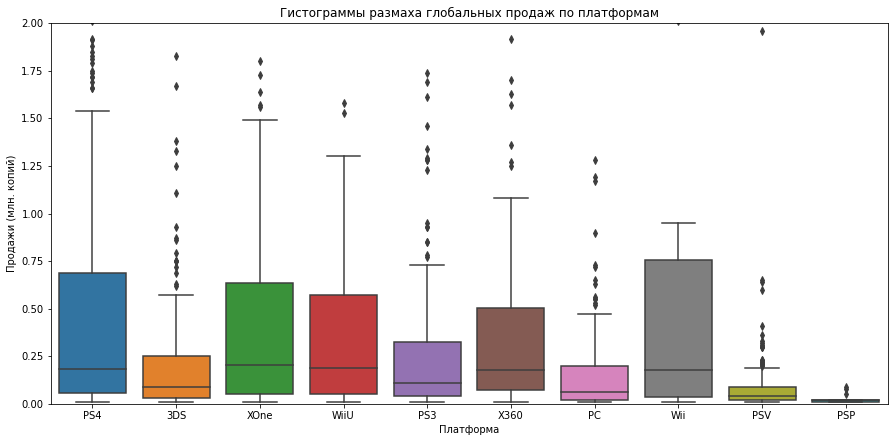

In [36]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=new_df, x='platform', y='total_sales')
plt.title('Гистограммы размаха глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.show()

# С другим масштабом
plt.figure(figsize=(15, 7))
sns.boxplot(data=new_df, x='platform', y='total_sales')
plt.title('Гистограммы размаха глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.ylim(0, 2)
plt.show()

In [37]:
# Отдельно выведем информацию методом describe() для большей наглядности
new_df.groupby('platform')['total_sales'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


На графике видно большое количество выбросов для всех платформ - скорее всего, это эксклюзивные тайтлы конкретных платформ, которые продаются успешнее всего - избавляться от этих выбросов мы не будем. В целом почти у всех платформ среднее заметно больше медианы. 

Судя по графику, самыми успешными **актуальными** платформами **PS4, XOne, WiiU**

#### Изучим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

**В качестве изучаемой платформы возьмем PS4**

Построим диаграммы рассеяния

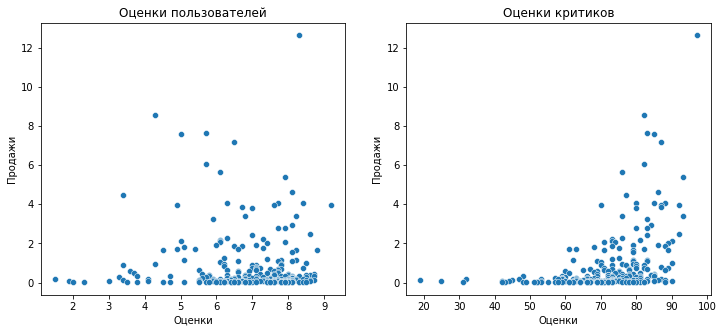

In [38]:
f, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title('Оценки пользователей')
axs[0].set_xlabel('Оценки')
axs[0].set_ylabel('Продажи')
axs[1].set_title('Оценки критиков')
axs[1].set_xlabel('Оценки')
axs[1].set_ylabel('Продажи')
sns.scatterplot(data=new_df[new_df['platform'] == 'PS4'], x='user_score', y='total_sales', ax=axs[0])
sns.scatterplot(data=new_df[new_df['platform'] == 'PS4'], x='critic_score', y='total_sales', ax=axs[1])
plt.show()

Изучим корреляцию между отзывами и продажами

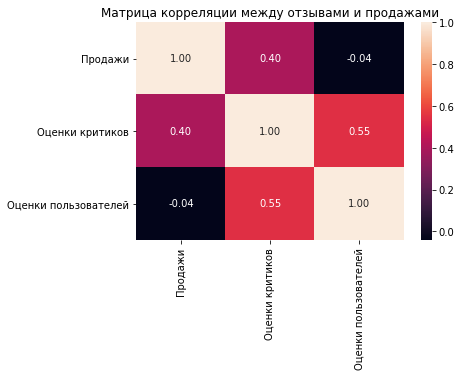

In [39]:
sns.heatmap(new_df[new_df['platform']=='PS4'][['total_sales', 'critic_score', 'user_score']].corr(), 
            annot=True, fmt='.2f',
            xticklabels=['Продажи', 'Оценки критиков', 'Оценки пользователей'], 
            yticklabels=['Продажи', 'Оценки критиков', 'Оценки пользователей'])

plt.title('Матрица корреляции между отзывами и продажами')
plt.show()

По диаграммам рассеяния видно, что пользователи ставят в основном оценки от 6 до 8, критики - от 60 до 85


По матрице корреляции видим, что **между оценками пользователей и продажами корреляции практически нет**, а **между оценками критиков и продажами наблюдается умеренная корреляция**, это можно объсянить тем, что критики зачастую получают игры на обзор ещё до официального релиза, и пользователи принимают решение о покупке после их оценки - эту мысль также подтверждает наличие корреляцим между оценками критиков и оценками пользователей.

#### Соотнесём эти выводы с продажами на других платформах

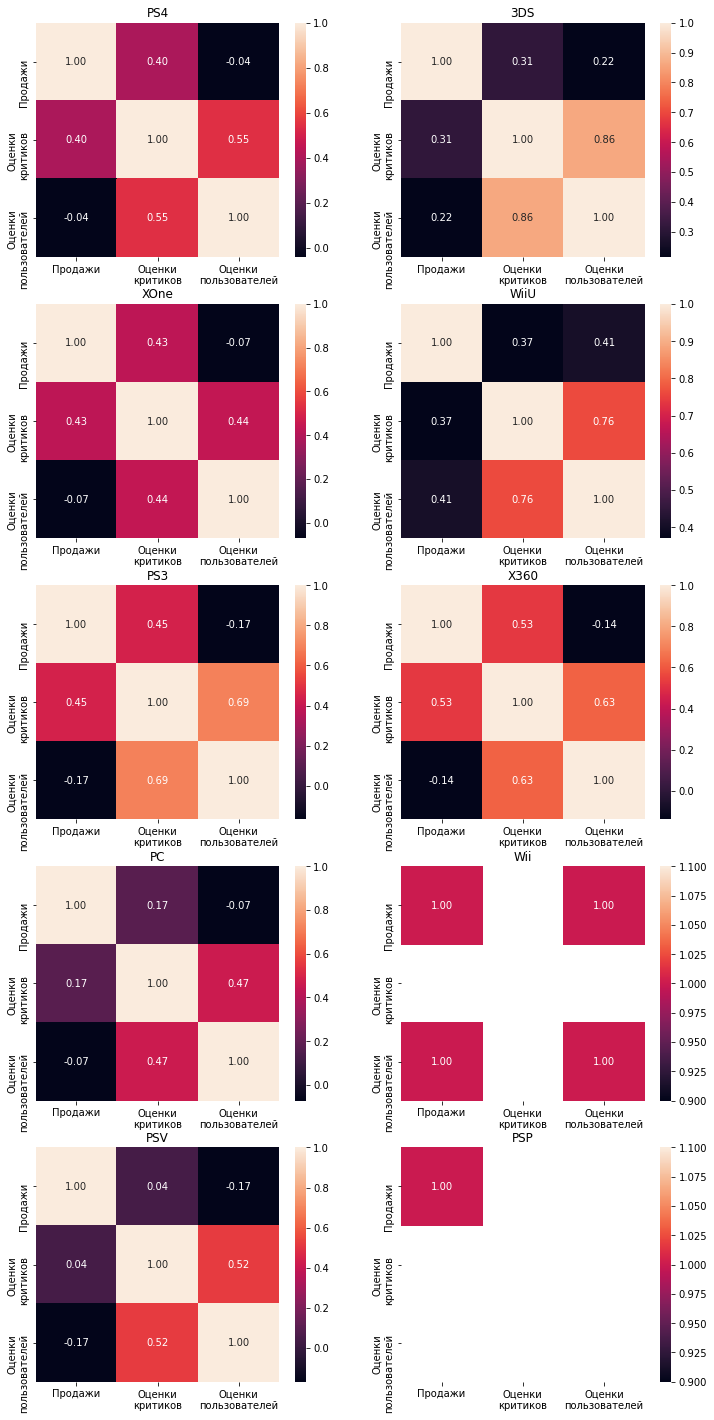

In [40]:
f, axs = plt.subplots(5, 2, figsize=(12, 25))
count_i = 0
count_j = 0
for i in new_df['platform'].unique():
    axs[count_i][count_j].set_title(i)
    
    sns.heatmap(new_df[new_df['platform'] == i][['total_sales', 'critic_score', 'user_score']].corr(), 
            annot=True, fmt='.2f', ax=axs[count_i][count_j],
            xticklabels=['Продажи', 'Оценки\nкритиков', 'Оценки\nпользователей'], 
            yticklabels=['Продажи', 'Оценки\nкритиков', 'Оценки\nпользователей'])
    axs[count_i][count_j].tick_params(axis='x', rotation=0)
    
    if count_j == 0:
        count_j += 1
    else:
        count_j = 0
        count_i += 1

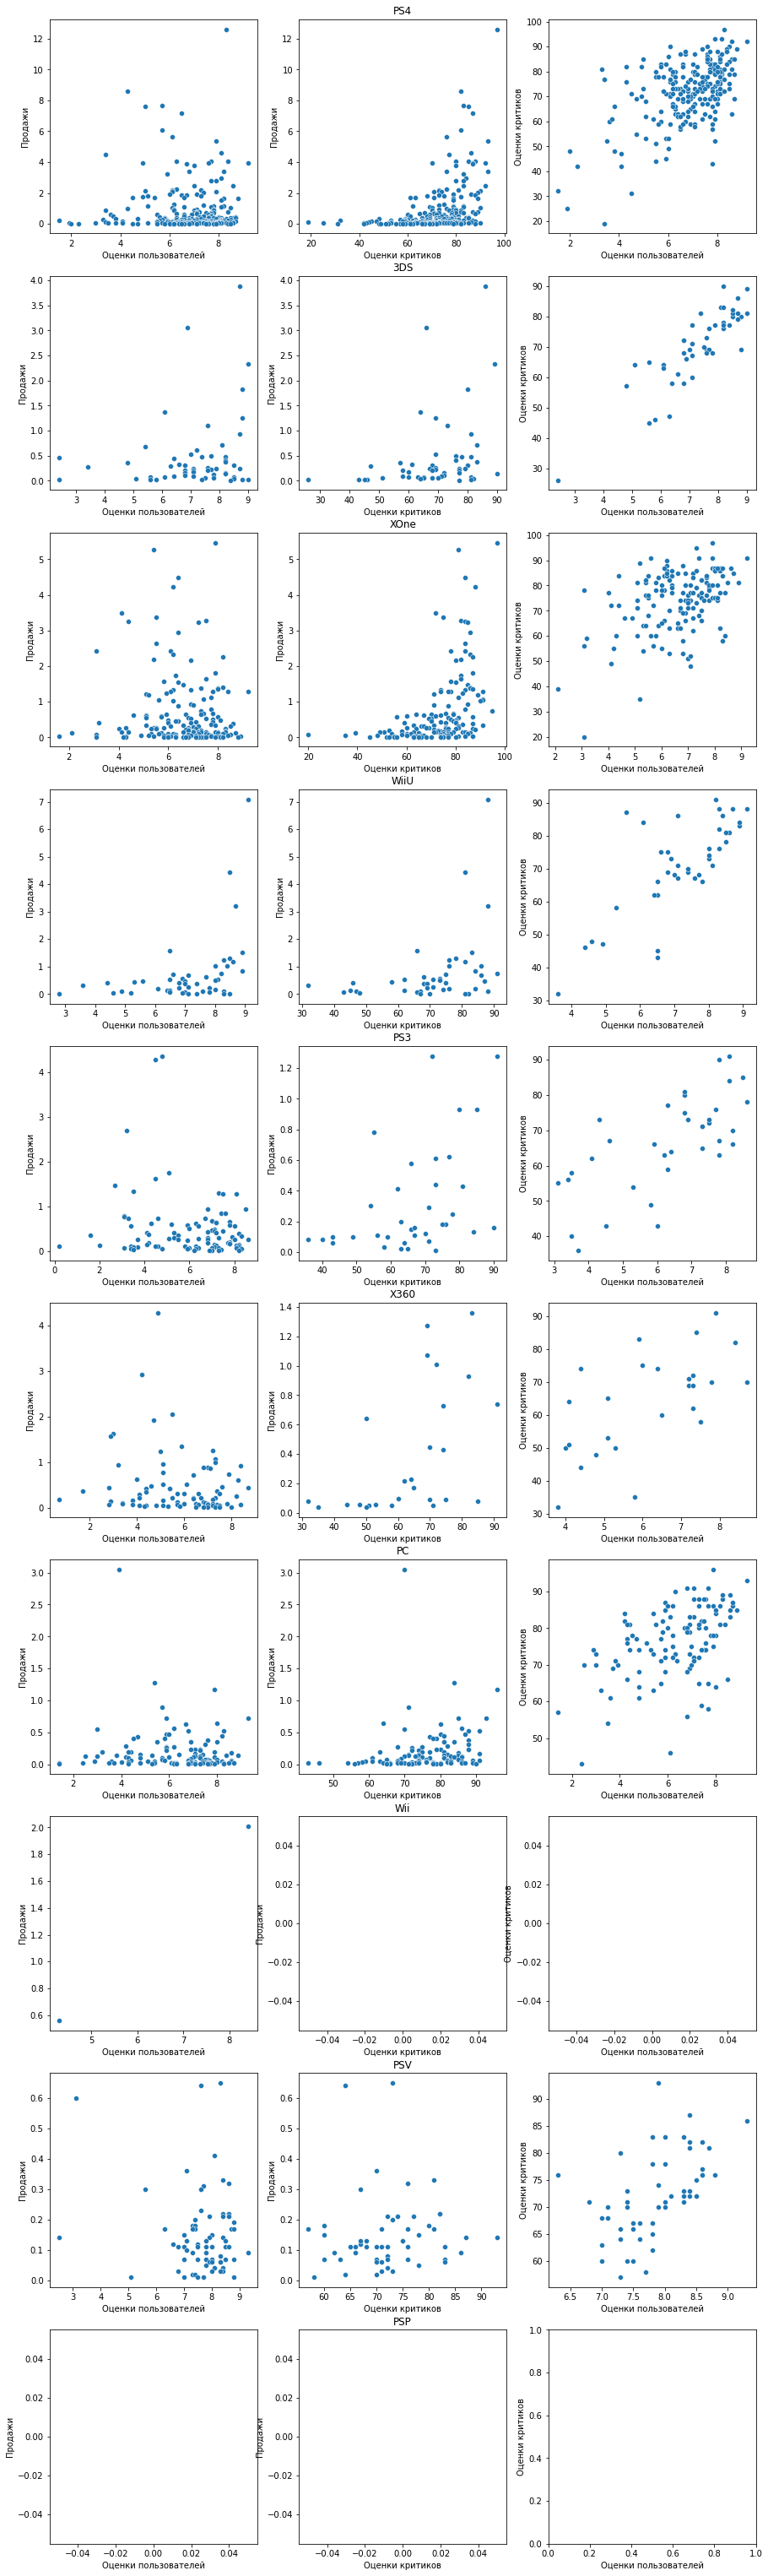

In [41]:
f, axs = plt.subplots(10, 3, figsize=(15, 55))
count_i = 0
for i in new_df['platform'].unique():
    axs[count_i][1].set_title(i)
    
    axs[count_i][0].set_xlabel('Оценки пользователей')
    axs[count_i][0].set_ylabel('Продажи')
    axs[count_i][1].set_xlabel('Оценки критиков')
    axs[count_i][1].set_ylabel('Продажи')
    axs[count_i][2].set_xlabel('Оценки пользователей')
    axs[count_i][2].set_ylabel('Оценки критиков')
    
    sns.scatterplot(data=new_df[new_df['platform'] == i], x="user_score", y="total_sales",
                    ax=axs[count_i][0])
    sns.scatterplot(data=new_df[new_df['platform'] == i], x="critic_score", y="total_sales",
                    ax=axs[count_i][1])
    sns.scatterplot(data=new_df[new_df['platform'] == i], x="user_score", y="critic_score",
                    ax=axs[count_i][2])
    
    count_i += 1

In [42]:
# Рассмотрим, аномалию с Wii и PSP
new_df[new_df['platform'].isin(['Wii', 'PSP'])].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
920,Uta no Prince-Sama: All Star After Secret,PSP,2015,Action,0.00,0.00,0.08,0.00,<NA>,NaN,no_ESRB,0.08
175,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.00,0.08,<NA>,NaN,E10+,0.95
80,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.00,0.17,<NA>,8.4,E10+,2.01
1539,Meiji Toukyou Renka: Twilight Kiss,PSP,2015,Action,0.00,0.00,0.02,0.00,<NA>,NaN,no_ESRB,0.02
1588,Bakumatsu Rock,PSP,2014,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01


Действительно, по другим платформам схожая ситуация - **практически отсутствие корреляции между продажами и оценками пользователей, умеренная корреляция между продажами и оценками критиков и умеренная корелляция между оценками пользователей и критиков.**

#### Посмотрим на общее распределение игр по жанрам

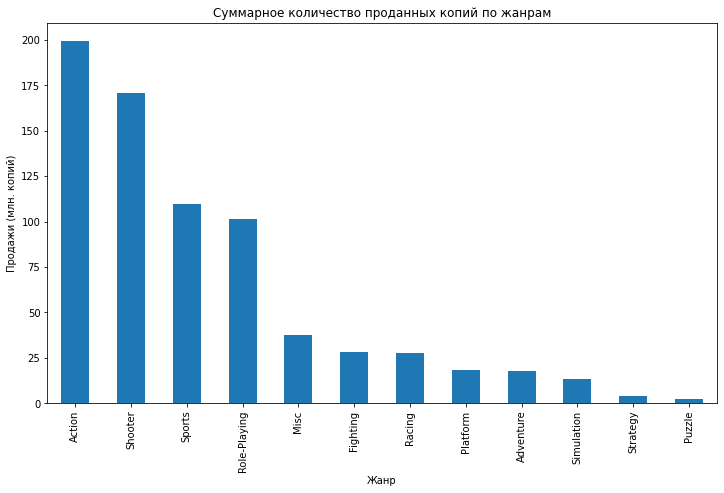

In [43]:
plt.figure(figsize=(12,7))
new_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',
                                                                             figsize=(12,7), 
                                                                             xlabel='Жанр', 
                                                                             ylabel='Продажи (млн. копий)', 
                                                                             title='Суммарное количество проданных копий по жанрам')
plt.show()

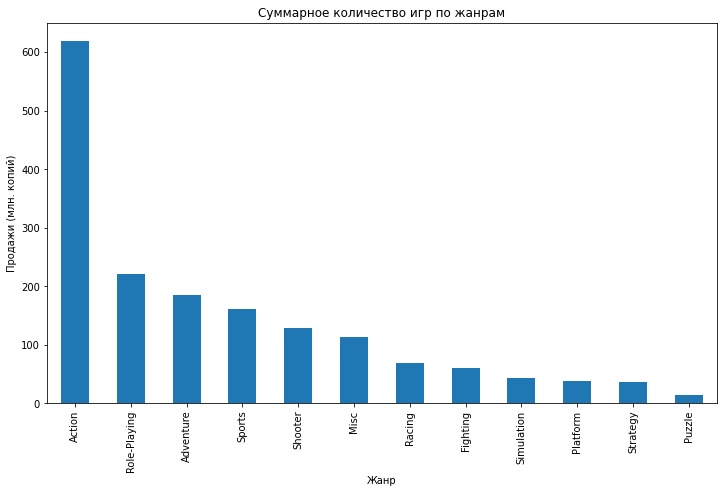

In [44]:
plt.figure(figsize=(12,7))
new_df.groupby('genre')['total_sales'].count().sort_values(ascending=False).plot(kind='bar',
                                                                             figsize=(12,7), 
                                                                             xlabel='Жанр', 
                                                                             ylabel='Продажи (млн. копий)', 
                                                                             title='Суммарное количество игр по жанрам')
plt.show()

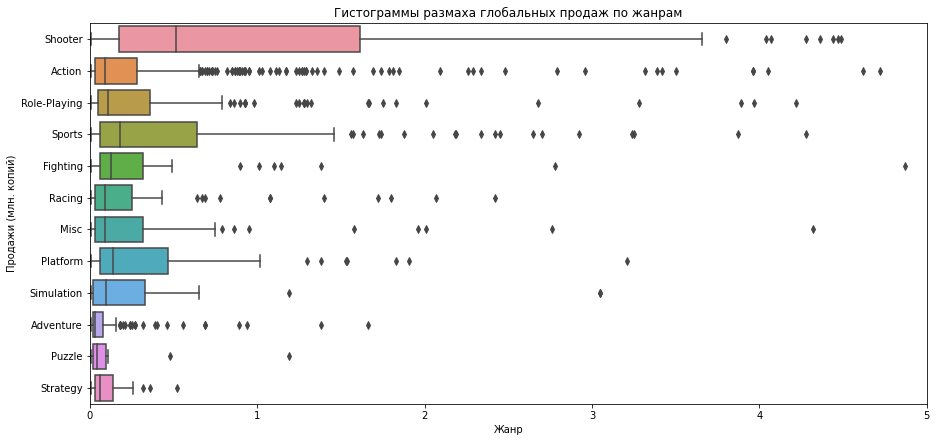

In [45]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=new_df, x='total_sales', y='genre')
plt.title('Гистограммы размаха глобальных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. копий)')
plt.xlim(0, 5)
plt.show()

Больше всего игр в жанре Action - их чуть ли не в 3 раза больше чем игр с жанром Role-Playing, которые занимают второе место. При этом по продажам выделяются следующие 4 жанра: Action, Shooter, Sports, Role-Playing. **Однако наиболее продаваемые и при этом стабильные по продажам игры имеют жанры Shooter, Sports**.
Самые непопулярные жанры - это Puzzle и Strategy - таких игр меньше всего и покупают их реже остальных.

#### Вывод по EDA
- Количество игр начало стремительно расти с 1990 года и **достигло своего пика в 2008-2009**, пока на смену многим консолям и ПК не пришли мобильные игры - с тех пор начался спад продаж
- Самые популярные платформы за всё время наблюдений: **PS2, X360, PS3, Wii, DS, PS, причём это довольно старые платформы, у которых уже имеется следующее поколение**
- Как правило, жизненный цикл платформы составляет **5-7 лет**
- Среди актуальных платформ наиболее востребованными являются **PS4, XOne, WiiU**
- Интересно, что **между продажами игр и оценками пользователей нет зависимости**, в то время как **между оценками критиков и продажами наблюдается умеренная корелляция**
- Наиболее продаваемые и при этом стабильные по продажам игры имеют жанры **Shooter, Sports**. Игры с жанрами **Role-Playing и Action** обладают самыми большими продажами, но лишь за счёт игр-бестселлеров, выводящих эти жанры в топ - их медиана продаж ниже чем у названых ранее жанров. Наименьший интерес вызывают игры с жанрами **Puzzle и Strategy**

### Составим портреты пользователей каждого региона

Определим для каждого региона **(2014-2016 год)**:
- Топ-5 популярных платформ
- Топ-5 популярных жанров
- Влияние ESRB на продажи

In [46]:
# Напишем функцию для удобства построения визуализаций и ответа на вопросы
def plot_regions(by):
    # Подписи
    label = 'платформам' if by == 'platform' else 'жанрам' if by == 'genre' else 'рейтингам'
    
    f, axs = plt.subplots(2, 3, figsize=(19, 14))
    count = 0
    
    # Строим столбчатые диаграммы
    for reg_sales in ['na_sales', 'eu_sales', 'jp_sales']:
        axs[0][count].set_title(f'Продажи по {label}, {reg_sales.split("_")[0].upper()}')

        axs[0][count].tick_params(labelrotation=45)
        sns.barplot(data=new_df, x=by, y=reg_sales, errwidth=0, ax=axs[0][count])
        count += 1

    count = 0
    # Строим круговые диаграммы
    for reg_sales in ['na_sales', 'eu_sales', 'jp_sales']:
        axs[1][count].set_title(f'Доли продаж по топ-5 {label}, {reg_sales.split("_")[0].upper()}')

        # Формируем сводную таблицу так, чтобы в ней были топ-5 + категория "остальные"
        a = new_df.groupby(by)[reg_sales].sum().sort_values(ascending=False).reset_index()
        a.loc[~a[by].isin(a[by].head()), by] = 'other'
        a = a.groupby(by)[reg_sales].sum().sort_values(ascending=False).reset_index()

        data = a[reg_sales]
        keys = a[by]

        explode = [0.1] + [0] * (a[by].shape[0] - 1)
        axs[1][count].pie(data, labels=keys, explode=explode, autopct='%.1f%%')

        count += 1
    plt.show()

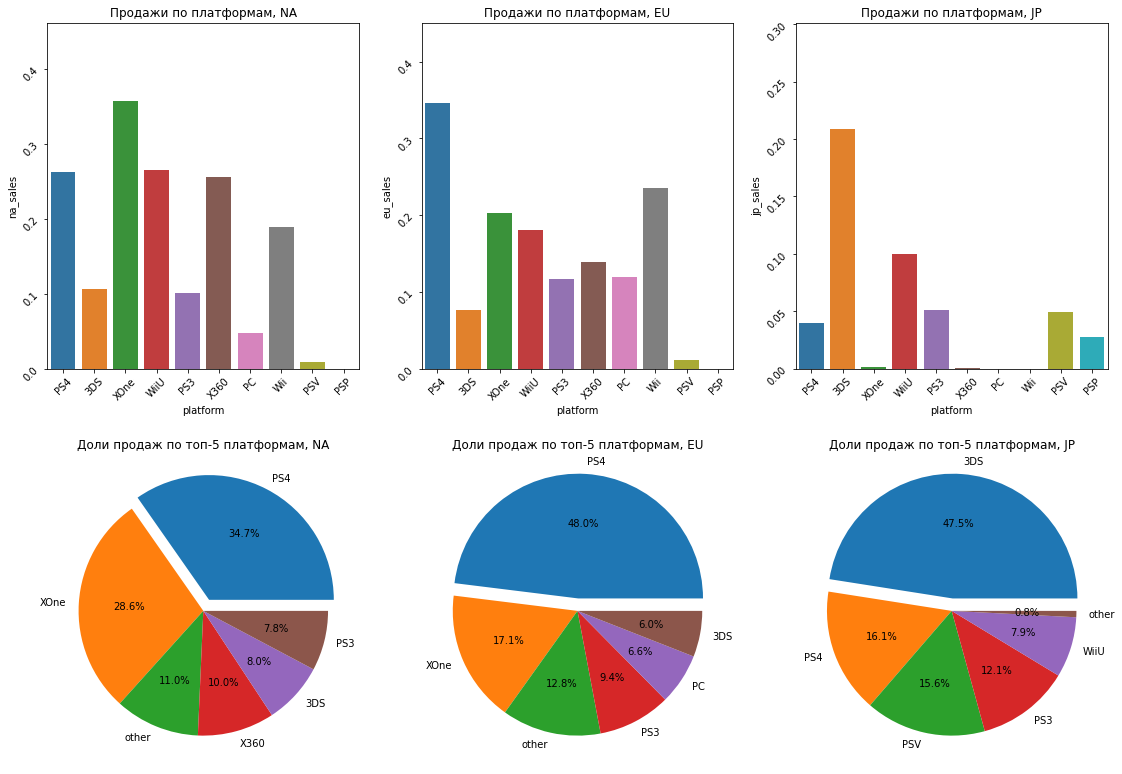

In [47]:
plot_regions('platform')

**Топ-5 платформ по продажам в Северной Америке:**
- PS4 (34.7%)
- XOne (28.6%)
- X360 (10%)
- 3DS (8%)
- PS3 (7.8%)

На остальные платформы приходится 11%

**Топ-5 платформ по продажам в Европе:**
- PS4 (48%)
- XOne (17.1%)
- PS3 (9.4%)
- PC (6.6%)
- 3DS (6.0%)

На остальные платформы приходится 12.8%

**Топ-5 платформ по продажам в Японии:**
- 3DS (47.5%)
- PS4 (16.1%)
- PSV (15.6%)
- PS3 (12.1%)
- WiiU (7.9%)

На остальные платформы приходится 0.8%


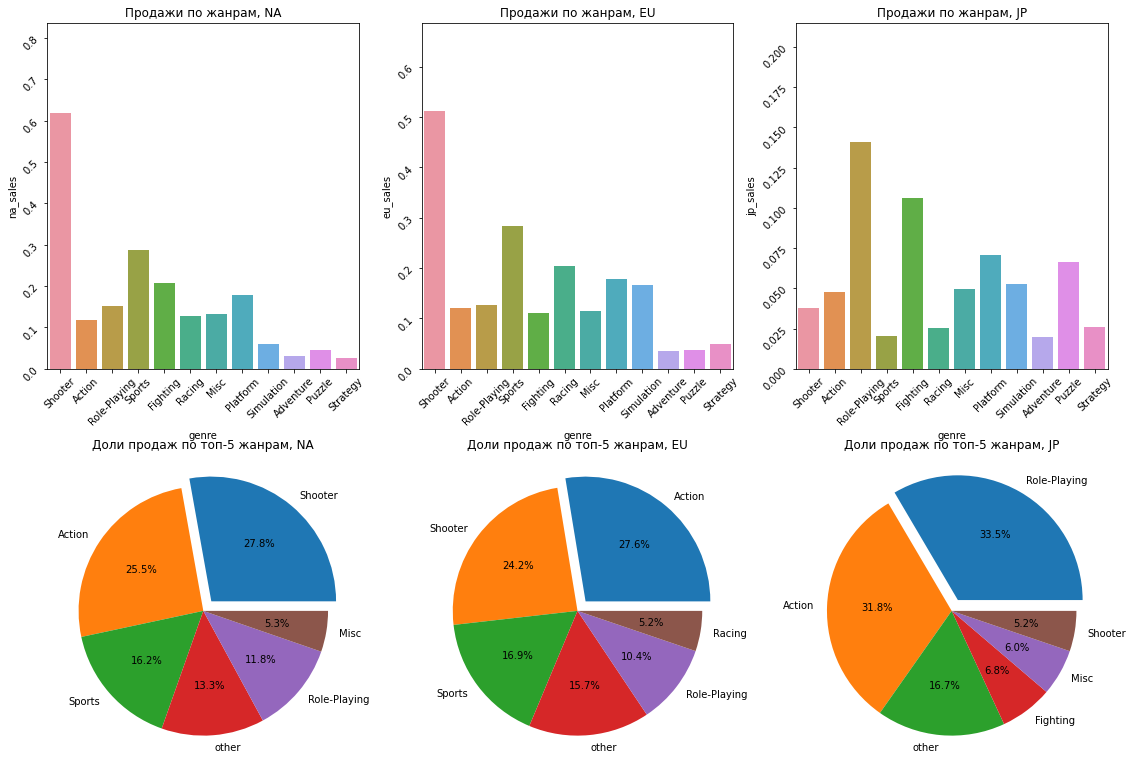

In [48]:
plot_regions('genre')

**Топ-5 жанров по продажам в Северной Америке:**
- Shooter (27.8%)
- Action (25.5%)
- Sports (16.2%)
- Role-Playing (11.8%)
- Misc (5.3%)

На остальные жанры приходится 13.3%

**Топ-5 жанров по продажам в Европе:**
- Action (27.6%)
- Shooter (24.2%)
- Sports (16.9%)
- Role-Playing (10.4%)
- Racing (5.2%)

На остальные жанры приходится 15.7%

**Топ-5 жанров по продажам в Японии:**
- Role-Playing (33.5%)
- Action (31.8%)
- Fighting (6.8%)
- Misc (6%)
- Shooter (5.2%)

На остальные жанры приходится 16.7%

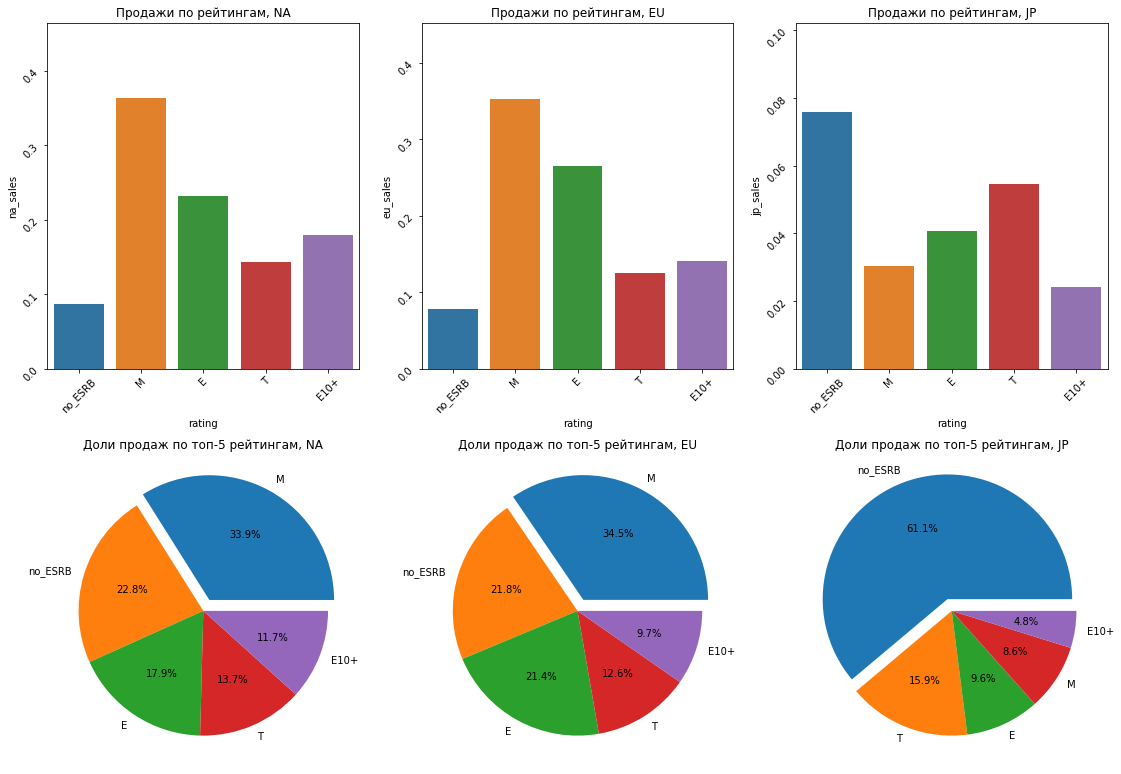

In [49]:
plot_regions('rating')

**Топ-5 рейтингов по продажам в Северной Америке:**
- M (33.9%)
- Без рейтинга (22.8%)
- E (17.8%)
- T (13.7%)
- E10+ (11.7%)

**Топ-5 рейтингов по продажам в Европе:**
- M (34.5%)
- Без рейтинга (21.8%)
- E (21.4%)
- T (12.6%)
- E10+ (9.7%)


**Топ-5 рейтингов по продажам в Японии:**
- Без рейтинга (61.1%)
- T (15.9%)
- E (9.6%)
- M (8.6%)
- E10+ (4.8%)


#### Выводы по профилям в разных странах

**Северная Америка:**
- В целом, на PS3, PS4 приходится 42.5%, а на XOne, X360 - 38.6%, **что говорит о примерно равном спросе на игры для консолей от Sony и Microsoft.**
- Наиболее продаваемые жанры - шутеры и экшны, за ними идут спортивные игры, далее игры с жанрами Role-Playing и Misc
- Если говорить про рейтинги игр, то треть проданых игр имеет рейтинг M (для взрослых), почти четверть игр не имеет рейтинг, 17% имеет рейтинг E (для всех), 13% - T (подросткам) и 11.7% - рейтинг E10+ (для всех от 10 лет и старше). 

**Европа:**
- **Здесь консоли от Sony пользуются большим приоритетом** - PS4 составляет почти половину от всех продаж, и вместе с PS3 имеют 57.4%, в то время как XOne имеет 17.1%, а X360 даже не попал в топ-5. **Интересно, что в топ-5 попали ПК.**
- Четвёрка лидеров та же, что и в Северной Америке: шутеры, экншы, спорт, но экшны здесь популярнее, а замыкают пятерку лидеров гоночные симуляторы.
- Ситуация аналогична Северной Америке: треть игр с рейтингом M (для взрослых), чуть больше 1/5 части игр не имеет рейтинг, другая пятая часть игр имеет рейтинг E (для всех), 12.6% игр с рейтингом T (подросткам), оставшиеся 9.7% - E10+ (для всех от 10 лет и старше)

**Япония:**
- На другие платформы приходится всего 0.8%. **Здесь видна чёткая доминация японских консолей**: весь топ-5 представлен консолями от Sony и Nintendo, самая популярная консоль - 3DS, составляет почти половину от всех продаж. В целом именно из-за этой консоли игры Nintendo продаются немного лучше, чем игры Sony (55.4% против 43.8%). Интересно, что лидер топа - это портативная консоль, к тому же в топе есть PSV, тоже являющаяся портативной. **При этом доля остальных консолей и ПК мизерна.**
- По жанрам относительно других регионов всё совсем иначе - на первом месте игры жанра Role-Playing, затем экшны, после этого идут файтинги, Misc и шутеры 
- Для 61.1% игр в Японии рейтинг не определён, для 15.9% - рейтинг T (подростковые игры), у рейтингов E, M примерно равные доли по продажам (8.6-9.6%), E10+ имеют 4.8% игр.

### Проверим несколько гипотез

Для проверки обеих гипотез мы будем использовать критерий Стьюдента (t-тест) - статистический метод, который позволяет сравнивать средние значения двух совокупностей и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет. Мы будем пользоваться методом **ttest_ind()**.

Для того, чтобы его применять, должны соблюдаться несколько условий:
- Генеральные совокупности не должны зависеть друг от друга.
- Выборочные средние должны быть нормально распределены -  благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений (а у нас явно больше), выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны - если выборки достаточно велики (30 и больше значений) и примерно равны по размеру между собой, то даже если дисперсии на самом деле не равны, тест редко ошибается. К тому же, в ttest_ind() есть параметр equal_var, отвечающий за равенство дисперсий - мы укажем значение False

При использовании данного теста нулевая и альтернативная гипотезы формируются следующим образом:

$$ H_0: µ_1 = µ_2; $$
$$ H_1: µ_1 ≠ µ_2, $$
Где µ - это среднее совокупности

#### Гипотеза I.
- **H0:** Средние пользовательские рейтинги платформ Xbox One и PC **одинаковы**
- **H1:** Средние пользовательские рейтинги платформ Xbox One и PC **отличны**
- **alpha** = 0.05

Проверим гипотезу с помощью **ttest_ind()**

In [50]:
# XOne была анонсирована в 2013 году и начала выпускаться ближе к концу года, поэтому возьмем данные с 2014 года
xone = df[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2014)]['user_score']
pc = df[(df['platform'] == 'PC') & (df['year_of_release'] >= 2014)]['user_score']

print('Средняя оценка для XOne:', xone.mean())
print('Средняя оценка для PC:', pc.mean())

alpha = 0.05
results = ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка для XOne: 6.594545454545454
Средняя оценка для PC: 6.298360655737704
p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов, принимаем нулевую гипотезу: **средние пользовательские рейтинги платформ Xbox One и PC схожи между собой.**

#### Гипотеза II.
Слегка поменяем формулировку гипотезы для удобства
- **H0:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») **одинаковые**.
- **H1:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») **отличны**
- **alpha** = 0.05

Проверим гипотезу с помощью **ttest_ind()**

In [52]:
# action = df[df['genre'] == 'Action']['user_score']
# sports = df[df['genre'] == 'Sports']['user_score']

action = new_df[new_df['genre'] == 'Action']['user_score']
sports = new_df[new_df['genre'] == 'Sports']['user_score']

print('Средняя оценка для Action:', action.mean())
print('Средняя оценка для Sports:', sports.mean())

alpha = 0.05
results = ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка для Action: 6.760606060606061
Средняя оценка для Sports: 5.225196850393701
p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Исходя из результатов, отвергаем нулевую гипотезу: **средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.**

### Вывод

Перед началом исследовательского анализа данных мы провели предобработку: привели названия столбцов в нижний регистр, преобразовали их типы, изучили пропущенные значения, заменили значения TBD на NaN.

В процессе анализа было выявлено, что резкий рост популярности игр приходится на начало 90-ых, а пик выпускаемых игр наступил в 2008-2009 году, затем индустрия пошла на спад - разработчики стали тратить больше времени и сил на разработку, помимо этого большую часть пользователей привлекло появление мобильных игр для смартфонов.

Самые популярные платформы за всё время наблюдений: PS2, X360, PS3, Wii, DS, PS, причём это неактуальные платформы, у которых уже имеется следующее поколение, а среди актуальных платформ наиболее востребованными являются PS4, XOne, WiiU. Как правило, жизненный цикл платформы составляет 5-7 лет - именно столько игры на этих платформах обладают большим спросом. При этом PC, то есть ПК, является наиболее стабильной платформой, что довольно логично - люди вряд ли перестанут играть в игры на компьютере даже при условии существования консолей. Для актуальности дальнейшего анализа были взяты данные с 2014 года.

Далее было изучено влияние оценок пользователей и критиков на продажи игр, было выявлено, что между оценками пользователей и продажами зависимости практически нет, а между оценками критиков и продажами наблюдается умеренная корреляция. Такой факт  можно объсянить тем, что критики зачастую получают игры на обзор ещё до официального релиза, и пользователи принимают решение о покупке после их оценки - эту мысль также подтверждает наличие корреляцим между оценками критиков и оценками пользователей.

Затем были составлены портреты пользователей в кжадом регионе. Портреты пользователей в Северной Америке и в Европе оказались примерно одинаковыми: самые популярные платформы - PS4 и XOne, самые популярные жанры - Action и Shooter, продаваемые игры чаще всего имеют рейтинг M (для взрослых). Однако, в Японии ситуация иная: наиболее популярными жанрами являются Role-Playing и Action, исключительно японские платформы входят в топ, самые популярные - 3DS и PS4, а среди проданных игр большинство имеет рейтинг T (подросткам).

Наконец, были проверены две гипотезы: средние пользовательские рейтинги жанров Action и Sports одинаковые и Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, обе гипотезы были приняты.

**Исходя из полученных знаний, можно дать следующую рекомендацию для бизнеса:**
- Игры для PS4 наиболее продаваемы почти во всех регионах, кроме Японии - спрос на них не упадёт, ведь консоль актуальна и игры на неё будут выпускаться вновь и вновь. Возможно, следует посмотреть и на XOne как на альтернативу для геймеров, а также на PC как самую стабильную платформу.
- Наиболее востребованы и при этом стабильны в продажах жанры Shooter и Sports - таких игр больше всего, и покупают их тоже больше остальных, поэтому следует рекламировать больше таких игр. Жанр Action тоже хвастается большими продажами, но только за счёт бестселлеров, - здесь к рекламным компаниям нужно подходить более осторожно.
- У продаваемых игр при этом должен быть рейтинг M или E - это более распространённые игры.


Таким образом, в Северной Америке и Европе в идеале следует делать больший упор на рекламу шутеров и экшнов для взрослых для PS4 и XOne, в то время как в Японии - на подростковые Role-Playing игры и экшны для японских консолей.